<a href="https://colab.research.google.com/github/SJhawar1010/Reinforcement-Learning/blob/main/Satyam_554_RL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reinforcement learning environment to support model-based algorithms for decision-making.

###  Dyna-Q Agent Class

In [11]:
from collections import defaultdict
import random
class DynaQAgent:
    def __init__(self, state_space, action_space, alpha=0.1, gamma=0.99, epsilon=0.1, planning_steps=10):
        self.state_space = state_space
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.planning_steps = planning_steps
        self.q_table = defaultdict(lambda: np.zeros(action_space))
        self.model = {}

    def epsilon_greedy_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

        self.model[(state, action)] = (reward, next_state)

    def planning(self):
        for _ in range(self.planning_steps):
            (state, action), (reward, next_state) = random.choice(list(self.model.items()))
            best_next_action = np.argmax(self.q_table[next_state])
            td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
            td_error = td_target - self.q_table[state][action]
            self.q_table[state][action] += self.alpha * td_error


### Training Dyn-Q agent

In [15]:
def train_dyna_q(env, agent, episodes=500):
    rewards = []
    for episode in range(episodes):
        reset_result = env.reset()
        # Handle different reset behaviors
        if isinstance(reset_result, tuple):
            state, _ = reset_result
        else:
            state = reset_result["observation"] if "observation" in reset_result else reset_result

        state = tuple(discretize_state(state))
        total_reward = 0
        done = False

        while not done:
            action = agent.epsilon_greedy_action(state)
            next_state, reward, terminated, truncated = env.step(action)
            next_state = tuple(discretize_state(next_state))
            agent.update(state, action, reward, next_state)
            agent.planning()

            state = next_state
            total_reward += reward
            done = terminated or truncated  # Combine termination conditions

        rewards.append(total_reward)
        if episode % 10 == 0:
            print(f"Episode {episode}: Total Reward: {total_reward}")

    return rewards


### Discretizing the CartPole state into buckets for learning.

In [16]:
import numpy as np
def discretize_state(state, bins=(10, 10, 10, 10)):
    cart_position_bins = np.linspace(-2.4, 2.4, bins[0])
    cart_velocity_bins = np.linspace(-3.0, 3.0, bins[1])
    pole_angle_bins = np.linspace(-0.5, 0.5, bins[2])
    pole_velocity_bins = np.linspace(-2.0, 2.0, bins[3])

    cart_pos, cart_vel, pole_ang, pole_vel = state
    return [
        np.digitize(cart_pos, cart_position_bins),
        np.digitize(cart_vel, cart_velocity_bins),
        np.digitize(pole_ang, pole_angle_bins),
        np.digitize(pole_vel, pole_velocity_bins)
    ]

### Plotting the Training Rewards

Episode 0: Total Reward: 10.0
Episode 10: Total Reward: 13.0
Episode 20: Total Reward: 13.0
Episode 30: Total Reward: 14.0
Episode 40: Total Reward: 18.0
Episode 50: Total Reward: 24.0
Episode 60: Total Reward: 63.0
Episode 70: Total Reward: 38.0
Episode 80: Total Reward: 25.0
Episode 90: Total Reward: 32.0
Episode 100: Total Reward: 16.0
Episode 110: Total Reward: 33.0
Episode 120: Total Reward: 28.0
Episode 130: Total Reward: 29.0
Episode 140: Total Reward: 41.0
Episode 150: Total Reward: 23.0
Episode 160: Total Reward: 19.0
Episode 170: Total Reward: 18.0
Episode 180: Total Reward: 25.0
Episode 190: Total Reward: 23.0
Episode 200: Total Reward: 17.0
Episode 210: Total Reward: 30.0
Episode 220: Total Reward: 25.0
Episode 230: Total Reward: 52.0
Episode 240: Total Reward: 31.0
Episode 250: Total Reward: 16.0
Episode 260: Total Reward: 31.0
Episode 270: Total Reward: 16.0
Episode 280: Total Reward: 14.0
Episode 290: Total Reward: 33.0
Episode 300: Total Reward: 48.0
Episode 310: Total 

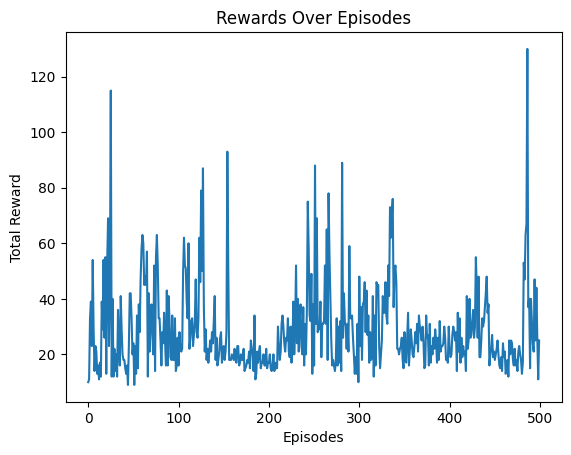

In [17]:
import gym
import matplotlib.pyplot as plt
if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    agent = DynaQAgent(state_space=4, action_space=env.action_space.n, planning_steps=10)

    episodes = 500
    rewards = train_dyna_q(env, agent, episodes)

    # Plot the rewards
    plt.plot(rewards)
    plt.title("Rewards Over Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.show()

## END